In [2]:
import matplotlib.pyplot as plt

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

RANDOM_STATE = 1048576

# Set random seed for reproducibility
torch.manual_seed(RANDOM_STATE)

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((342, 245)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

# Load the entire dataset from a single directory
full_dataset = datasets.ImageFolder(root='dataset', transform=transform)

# Print the total number of images and class names
print(f"Total number of images: {len(full_dataset)}")
print(f"Classes: {full_dataset.classes}")

# Define the split ratios (e.g., 80% train, 10% validation, 10% test)
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Print the size of each split
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Create data loaders for each split
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Example: Iterate over the training data loader to check the data
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")  # e.g., torch.Size([32, 3, 342, 245])
    print(f"Batch of labels: {labels}")              # e.g., tensor([0, 1, 0, 1, ...])
    break  # Break after the first batch for demonstration

Total number of images: 18875
Classes: ['base1', 'base2', 'base3', 'base4', 'base5', 'base6', 'basep', 'bp', 'bw1', 'bw10', 'bw11', 'bw2', 'bw3', 'bw4', 'bw5', 'bw6', 'bw7', 'bw8', 'bw9', 'bwp', 'cel25', 'cel25c', 'col1', 'dc1', 'det1', 'dp1', 'dp2', 'dp3', 'dp4', 'dp5', 'dp6', 'dp7', 'dpp', 'dv1', 'ecard1', 'ecard2', 'ecard3', 'ex1', 'ex10', 'ex11', 'ex12', 'ex13', 'ex14', 'ex15', 'ex16', 'ex2', 'ex3', 'ex4', 'ex5', 'ex6', 'ex7', 'ex8', 'ex9', 'fut20', 'g1', 'gym1', 'gym2', 'hgss1', 'hgss2', 'hgss3', 'hgss4', 'hsp', 'mcd11', 'mcd12', 'mcd14', 'mcd15', 'mcd16', 'mcd17', 'mcd18', 'mcd19', 'mcd21', 'mcd22', 'neo1', 'neo2', 'neo3', 'neo4', 'np', 'pgo', 'pl1', 'pl2', 'pl3', 'pl4', 'pop1', 'pop2', 'pop3', 'pop4', 'pop5', 'pop6', 'pop7', 'pop8', 'pop9', 'ru1', 'si1', 'sm1', 'sm10', 'sm11', 'sm115', 'sm12', 'sm2', 'sm3', 'sm35', 'sm4', 'sm5', 'sm6', 'sm7', 'sm75', 'sm8', 'sm9', 'sma', 'smp', 'sv1', 'sv2', 'sv3', 'sv3pt5', 'sv4', 'sv4pt5', 'sv5', 'sv6', 'sv6pt5', 'sv7', 'sv8', 'sv8pt5', 'sv9',

Label: 114
Class Name: sv4


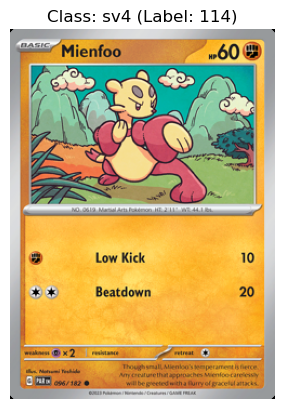

In [12]:
images, labels = next(iter(train_loader))

# Extract the single image and label
image = images[0]  # Shape: [C, H, W]
label = labels[0].item()  # Convert tensor to integer

# Print the label and class name
print(f"Label: {label}")
print(f"Class Name: {full_dataset.classes[label]}")

# Reverse the normalization for visualization
# This step is necessary if you applied Normalize in the transform
unnorm_transform = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
image = unnorm_transform(image)

# Convert the tensor to a format suitable for matplotlib
# (Change from [C, H, W] to [H, W, C] and ensure it's in range [0, 1])
image = image.permute(1, 2, 0).numpy()

# Clip values to ensure they are in the valid range [0, 1]
image = image.clip(0, 1)

# Display the image
plt.imshow(image)
plt.title(f"Class: {full_dataset.classes[label]} (Label: {label})")
plt.axis('off')  # Hide axes
plt.show()

# Classes

In [ ]:
import pandas as pd

pd.Series(full_dataset.targets).value_counts().describe() # Class count desciption

count    165.000000
mean     114.393939
std       74.241670
min        5.000000
25%       56.000000
50%      110.000000
75%      165.000000
max      304.000000
Name: count, dtype: float64

In [17]:
from collections import Counter

class_counts = Counter(full_dataset.targets)
least_common_classes = dict(class_counts.most_common()[::-1][:3])
most_common_classes = dict(class_counts.most_common()[:3])
idx_to_classes = {v: k for k, v in full_dataset.class_to_idx.items()}

print(f'The least common classes are: {[idx_to_classes[k] for k in list(least_common_classes.keys())]}, with frequencies {list(least_common_classes.values())}')
print(f'The most common classes are: {[idx_to_classes[k] for k in list(most_common_classes.keys())]}, with frequencies {list(most_common_classes.values())}')

The least common classes are: ['fut20', 'bp', 'tk1b'], with frequencies [5, 9, 10]
The most common classes are: ['swshp', 'swsh8', 'sv2'], with frequencies [304, 284, 279]


Classes are imbalanced